<a href="https://colab.research.google.com/github/casangi/cngi_prototype/blob/master/docs/calibration/self_calibration_solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In Development

(https://casaguides.nrao.edu/index.php/First_Look_at_Imaging) will be used. 

This walkthrough is designed to be run in a Jupyter notebook on Google Colaboratory. To open the notebook in colab, go [here](https://colab.research.google.com/github/casangi/cngi_prototype/blob/master/docs/calibration/self_calibration_solve.ipynb).

## Installation and Dataset Download


In [ ]:
import os

os.system("pip install --extra-index-url https://test.pypi.org/simple/ cngi-prototype==0.0.85")

!gdown -q --id 1esqPjOVVr-fuox78lqL7kxXv3Dt-T7Ox
!unzip selfcal_sim1_1scan.vis.zarr.zip

%matplotlib widget
import xarray as xr
xr.set_options(display_style="html")
print('complete')

In [ ]:
#Reload modules
%load_ext autoreload
%autoreload 2

In [1]:
import xarray as xr
from cngi.dio import read_vis, read_image, write_vis
from ngcasa.calibration import self_cal
from cngi.vis import chan_average, time_average, apply_flags
#from cngi.vis import apply_flag
import dask

xr.set_options(display_style="html")
#Dims  (time: 300,baseline: 1128, chan: 11, pol: 4)
#Zarr chunks (time: 10, baseline: 1128, chan: 2, pol: 4)
vis_mxds = read_vis("selfcal_sim1_1scan.vis.zarr",chunks={'time':100,'chan':12})
vis_mxds_flagged = apply_flags(vis_mxds,vis='xds0')

sel_parms = {}
sel_parms['xds'] = 'xds0'
sel_parms['data_group_in_id'] = 0
sel_parms['data_group_out_id'] = 0

solve_parms= {}
# solve_parms['gaintype']='T'
# solve_parms['solint']='int'
# solve_parms['refant_id']=None
# solve_parms['phase_only']=False
# solve_parms['minsnr']=0.0
# solve_parms['minblperant']=4


sc_vis_mxds = self_cal(vis_mxds_flagged, solve_parms, sel_parms)
write_vis(sc_vis_mxds,"cor_selfcal_sim1_1scan.vis.zarr")
#sc_vis_mxds.xds0

######################### Start self_cal #########################
Setting default gaintype  to  T
Setting default solint  to  int
Setting default refant_id  to  -1
Setting default phase_only  to  False
Setting default minsnr  to  0.0
Setting default minblperant  to  4
Setting default ginfo  to  False
Setting data_group_in  to  {'data': 'DATA', 'flag': 'FLAG', 'id': '0', 'uvw': 'UVW', 'weight': 'DATA_WEIGHT'}
Setting default data_group_out [' data ']  to  DATA
Setting default data_group_out [' flag ']  to  FLAG
Setting default data_group_out [' uvw ']  to  UVW
Setting default data_group_out [' weight ']  to  DATA_WEIGHT
Setting default data_group_out [' corrected_data ']  to  CORRECTED_DATA
Setting default data_group_out [' corrected_data_weight ']  to  CORRECTED_DATA_WEIGHT
Setting default data_group_out [' corrected_flag ']  to  CORRECTED_FLAG
Setting default data_group_out [' flag_info ']  to  FLAG_INFO
######################### Created self_cal graph #########################
t1 0.

<xarray.Dataset>
Dimensions:                (baseline: 1128, flag_info: 3, pol: 4, pol_id: 1, spw_id: 1, time: 20, uvw_index: 3)
Coordinates:
  * baseline               (baseline) int64 0 1 2 3 4 ... 1124 1125 1126 1127
    chan                   float64 1.38e+11
    chan_width             float64 dask.array<chunksize=(), meta=np.ndarray>
    effective_bw           float64 dask.array<chunksize=(), meta=np.ndarray>
  * pol                    (pol) int64 5 6 7 8
  * pol_id                 (pol_id) int32 2
    resolution             float64 dask.array<chunksize=(), meta=np.ndarray>
  * spw_id                 (spw_id) int32 0
  * time                   (time) datetime64[ns] 2019-01-22T20:06:24.67199993...
Dimensions without coordinates: flag_info, uvw_index
Data variables:
    ANTENNA1               (baseline) int32 dask.array<chunksize=(1128,), meta=np.ndarray>
    ANTENNA2               (baseline) int32 dask.array<chunksize=(1128,), meta=np.ndarray>
    ARRAY_ID               (time, base

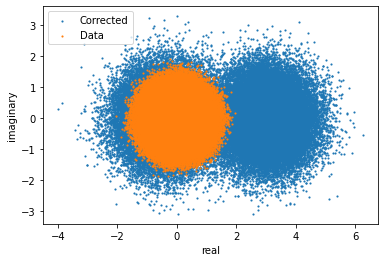

In [2]:
import xarray as xr
import matplotlib.pylab as plt
import numpy as np
from cngi.vis import chan_average
from cngi.dio import read_vis
import dask

sc_vis_mxds = read_vis("cor_selfcal_sim1_1scan.vis.zarr",chunks={'time':100})
xds = sc_vis_mxds.xds0.isel(chan=5,time=slice(0,20))
print(xds)

corr_real = np.real(np.ravel(xds.CORRECTED_DATA))
corr_imag = np.imag(np.ravel(xds.CORRECTED_DATA))
data_real = np.real(np.ravel(xds.DATA))
data_imag = np.imag(np.ravel(xds.DATA))

plt.figure()
plt.scatter(corr_real,corr_imag,5,label='Corrected',marker='.')
plt.scatter(data_real,data_imag,5,label='Data',marker='.')
plt.xlabel('real')
plt.ylabel('imaginary')
plt.legend()
plt.show()


<xarray.Dataset>
Dimensions:                (baseline: 1128, chan: 1, flag_info: 3, pol: 4, pol_id: 1, spw_id: 1, time: 1, uvw_index: 3)
Coordinates:
  * pol                    (pol) int64 5 6 7 8
  * pol_id                 (pol_id) int32 2
  * spw_id                 (spw_id) int32 0
  * chan                   (chan) float64 1.38e+11
    chan_width             (chan) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    effective_bw           (chan) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    resolution             (chan) float64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time                   (time) datetime64[ns] 2019-01-22T20:11:27.263999989
  * baseline               (baseline) int64 0 1 2 3 4 ... 1124 1125 1126 1127
Dimensions without coordinates: flag_info, uvw_index
Data variables:
    ARRAY_ID               (time, baseline) int32 dask.array<chunksize=(1, 1128), meta=np.ndarray>
    CORRECTED_FLAG         (time, baseline, chan, pol) complex128 dask.array<chun

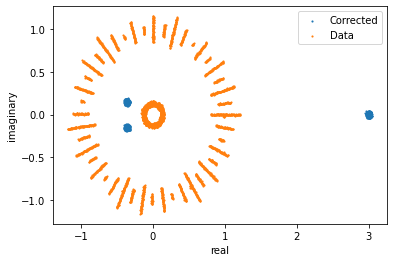

In [3]:
import xarray as xr
import matplotlib.pylab as plt
import numpy as np
from cngi.vis import chan_average, time_average
from cngi.dio import read_vis
import dask

sc_vis_mxds = read_vis("cor_selfcal_sim1_1scan.vis.zarr",chunks={'time':100})
mxds = time_average(chan_average(sc_vis_mxds,'xds0',width=11),'xds0',bin=300)
print(mxds.xds0)

xds = mxds.xds0

corr_real = np.real(np.ravel(xds.CORRECTED_DATA))
corr_imag = np.imag(np.ravel(xds.CORRECTED_DATA))
data_real = np.real(np.ravel(xds.DATA))
data_imag = np.imag(np.ravel(xds.DATA))

plt.figure()
plt.scatter(corr_real,corr_imag,5,label='Corrected',marker='.')
plt.scatter(data_real,data_imag,5,label='Data',marker='.')
plt.xlabel('real')
plt.ylabel('imaginary')
plt.legend()
plt.show()
